# US Immigration Statistics Analysis

In [1]:
# linear algebra library 
import numpy as np 

# data processing 
import pandas as pd 
import re

# plotting graphs 
import seaborn as sns 
import matplotlib.pyplot as plt 

# datetime analysis 
import datetime

# SQL
import sqlite3
from pathlib import Path

We import the data in as a csv. 

In [2]:
data = pd.read_csv("immigration_data.csv", index_col = False)
data.head(5)

,Year,Immigrants Obtaining Lawful Permanent Resident Status,Refugee Arrivals,Noncitizen Apprehensions,Noncitizen Removals,Noncitizen Returns
0,1980,"524,295","207,116","910,361","18,013","719,211"
1,1981,"595,014","159,252","975,780","17,379","823,875"
2,1982,"533,624","98,096","970,246","15,216","812,572"
3,1983,"550,052","61,218","1,251,357","19,211","931,600"
4,1984,"541,811","70,393","1,246,981","18,696","909,833"


We notice an extra index column created by pandas. We remove this since we don't need it. 

In [3]:
data.reset_index(drop=True, inplace=True)

## Exploring the Data

We do a bit of data exploration to familiarize ourselves with the data. 

In [4]:
data.columns

Index(['Year', 'Immigrants Obtaining Lawful Permanent Resident Status',
       'Refugee Arrivals', 'Noncitizen Apprehensions', 'Noncitizen Removals',
       'Noncitizen Returns'],
      dtype='object')

In [5]:
data.shape

(42, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Year                                                   42 non-null     int64 
 1   Immigrants Obtaining Lawful Permanent Resident Status  42 non-null     object
 2   Refugee Arrivals                                       42 non-null     object
 3   Noncitizen Apprehensions                               42 non-null     object
 4   Noncitizen Removals                                    42 non-null     object
 5   Noncitizen Returns                                     42 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.1+ KB


There are 42 rows and 6 columns. Every column except Year has "object" status. For further analysis, we'll need to turn this into a float. 

### Data Adjustments

We make some changes to the data to make it usable. 

In [7]:
data.rename(columns={"Immigrants Obtaining Lawful Permanent Resident Status":"Lawful_immigrants"}, inplace=True)
data.rename(columns={"Refugee Arrivals":"Refugee_arrivals"}, inplace=True)
data.rename(columns={"Noncitizen Apprehensions":"Noncitizen_apprehensions"}, inplace=True)
data.rename(columns={"Noncitizen Removals":"Noncitizen_removals"}, inplace=True)
data.rename(columns={"Noncitizen Returns":"Noncitizen_returns"}, inplace=True)

We remove the commas from column values to make analysis easier. We have to cast as "str" to avoid possible type conflicts.

In [8]:
for column in data.columns:
    data[column] = data[column].astype(str).str.replace(r"\(.*\)", " ", regex=True)
    data[column] = data[column].astype(str).str.replace(r"\[.*\]", " ", regex=True)
    
    # we don't replace with a whitespace character as to avoid numeric issues
    data[column] = data[column].astype(str).str.replace(r",","", regex=True)
    data[column] = data[column].astype(str).str.strip()

In [9]:
data.head()

,Year,Lawful_immigrants,Refugee_arrivals,Noncitizen_apprehensions,Noncitizen_removals,Noncitizen_returns
0,1980,524295,207116,910361,18013,719211
1,1981,595014,159252,975780,17379,823875
2,1982,533624,98096,970246,15216,812572
3,1983,550052,61218,1251357,19211,931600
4,1984,541811,70393,1246981,18696,909833


### Basic Summary Statistics

We convert every column to an integer, since all of our data consists of whole numbers. 

In [10]:
for column in data.columns:
    data[column] = data[column].astype(int)

In [11]:
data.dtypes

Year                        int64
Lawful_immigrants           int64
Refugee_arrivals            int64
Noncitizen_apprehensions    int64
Noncitizen_removals         int64
Noncitizen_returns          int64
dtype: object

We obtain the basic summary statistics for each column except Year. 

In [12]:
data["Lawful_immigrants"].describe()


count    4.200000e+01
mean     9.142861e+05
std      2.797462e+05
min      5.242950e+05
25%      6.657900e+05
50%      9.656640e+05
75%      1.061369e+06
max      1.826595e+06
Name: Lawful_immigrants, dtype: float64

In [13]:
data["Refugee_arrivals"].describe()

count        42.000000
mean      73705.333333
std       37346.453158
min       11454.000000
25%       54399.500000
50%       69914.500000
75%       85211.000000
max      207116.000000
Name: Refugee_arrivals, dtype: float64

In [14]:
data["Noncitizen_apprehensions"].describe()


count    4.200000e+01
mean     1.136983e+06
std      3.458046e+05
min      5.965600e+05
25%      8.944992e+05
50%      1.132329e+06
75%      1.318212e+06
max      1.865379e+06
Name: Noncitizen_apprehensions, dtype: float64

In [15]:
data["Noncitizen_removals"].describe()


count        42.000000
mean     179951.142857
std      145240.084267
min       15216.000000
25%       33498.500000
50%      178963.500000
75%      323072.750000
max      432201.000000
Name: Noncitizen_removals, dtype: float64

In [16]:
data["Noncitizen_returns"].describe()

count    4.200000e+01
mean     8.464116e+05
std      4.834266e+05
min      1.004540e+05
25%      3.594840e+05
50%      9.216950e+05
75%      1.103602e+06
max      1.675876e+06
Name: Noncitizen_returns, dtype: float64

## Data Visualization

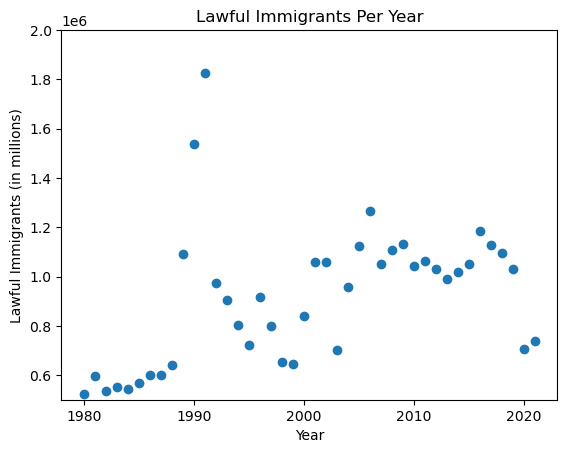

In [17]:
plt.scatter(data["Year"], data["Lawful_immigrants"])
plt.title("Lawful Immigrants Per Year")
plt.xlabel("Year")
plt.ylabel("Lawful Immigrants (in millions)")

plt.ylim(500000, 2000000)

plt.show()

We notice a steep drop-off right before 2020 in the number of lawful immigrants. This is due to COVID-19. A similar drop in 2002 is likely due to September 11. 

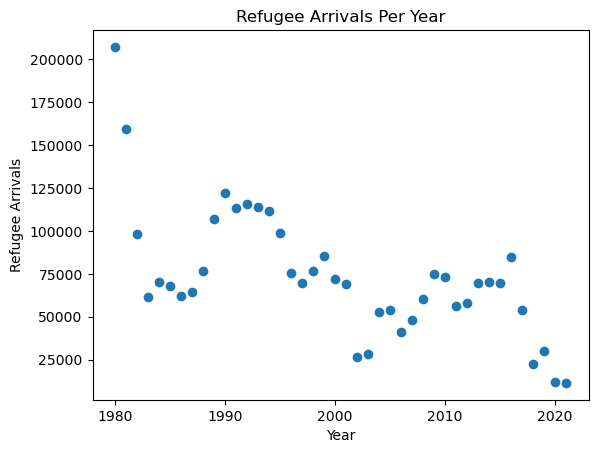

In [18]:
plt.scatter(data["Year"], data["Refugee_arrivals"])
plt.title("Refugee Arrivals Per Year")
plt.xlabel("Year")
plt.ylabel("Refugee Arrivals")

plt.show()

We notice a huge drop in the quantities of refugee arrivals gradually. This is due to increased scrutiny in refugee admittance and anti-refugee policies enacted by both the Obama and Trump administrations. 

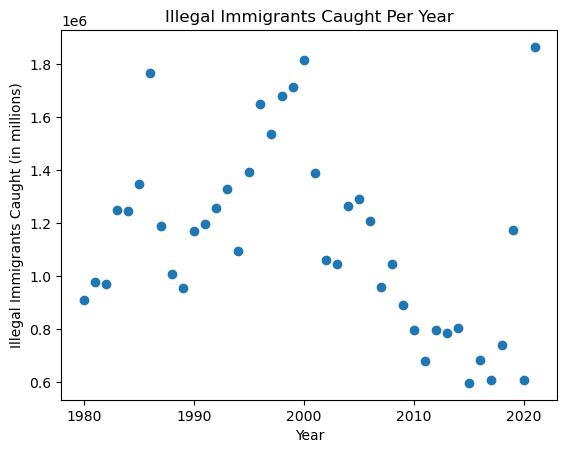

In [19]:
plt.scatter(data["Year"], data["Noncitizen_apprehensions"])
plt.title("Illegal Immigrants Caught Per Year")
plt.xlabel("Year")
plt.ylabel("Illegal Immigrants Caught (in millions)")

plt.show()

The sharp spike in 2021 of illegal immigrants is likely due to increased governance from a Republican congress on illegal immigration. Otherwise the illegal immigrant count is relatively consistent at around one million per year. 

## SQL Queries

We begin by exporting our "corrected" data over as a CSV. 

In [20]:
data.to_csv('immigration_data_fixed.csv', header=True, index=False)

In [21]:
data_fixed = pd.read_csv("immigration_data_fixed.csv")

In [22]:
Path("immigration_data.db").touch()
data_conn = sqlite3.connect("immigration_data.db")
data_cursor = data_conn.cursor()

We begin by creating a SQL table via which we may proceed. 